In [1]:
import sys
#!{sys.executable} -m pip install jupyterthemes
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3


In [15]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#reviews_datasets=pd.read_csv('D:/so-data/react-native-posts.csv'  )
reviews_datasets=pd.read_excel('D:/so-data/framework-related-posts-september/react_native.xlsx'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Id  AcceptedAnswerId  AnswerCount  \
0   29925616          29930598            1   
1   30028086          30028347            1   
2   29970434          29971118            3   
3   30113040          30113642            1   
4   30012662          30012855            1   
5   29290299          29304365            1   
6   29291286          29301078            2   
7   29300732          29300810            4   
8   29308105          29308221            1   
9   29966040          30008487            1   
10  29309970          29310137            2   
11  29840659          29850099            1   
12  29294913          29304153            6   
13  30202705          30202913           11   
14  30023518          30030972            1   
15  29287987          29305702           14   
16  29316825          29318419            4   
17  30203044          30204697            4   
18  30228541          30243019            2   
19  29317259          29317314            1   

            

In [17]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title'] +' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ParentId,PostTypeId,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,CombinedTitleBody
0,29925616,29930598,1,"<p>I have a row of controls/buttons, and each ...",NaN,2,NaN,2015-04-28 17:02:31.543,0,2015-04-29 13:00:59.327,...,0,1,0,<react-native>,How to repeat styles in React-native,1165,"<pre><code>&lt;View&gt;\n {['Left', 'Right', ...",2015-04-28 21:51:54.070,-4.0,How to repeat styles in React-native
1,30028086,30028347,1,<p>I am trying to re-render a component based ...,NaN,0,NaN,2015-05-04 10:40:24.633,1,2015-05-04 10:55:14.610,...,0,1,1,<javascript><reactjs><react-native>,Component not updating on props update,3195,<p>When <code>StoryContainer.handleClick</code...,2015-05-04 10:55:14.610,0.0,Component not updating on props update
2,29970434,29971118,3,"<p>For example, I wanna show a list of names. ...",NaN,0,NaN,2015-04-30 14:28:18.983,10,2017-07-22 06:13:22.307,...,0,1,48,<react-native><react-jsx>,How to concatenate JSX components in React Native,35591,<p>Figures I figure it out soon as I ask stack...,2015-04-30 14:59:07.690,0.0,How to concatenate JSX components in React Native
3,30113040,30113642,1,<p>I'm attempting to display an image and call...,NaN,0,NaN,2015-05-07 22:58:56.667,1,2015-05-08 05:01:34.900,...,0,1,0,<javascript><react-native>,Can't call function on react-native-video item,1476,<p>When you return a component from an event h...,2015-05-08 00:03:51.627,-2.0,Can't call function on react-native-video item
4,30012662,30012855,1,"<p>Im playing with React Native, and have depl...",NaN,0,NaN,2015-05-03 10:17:05.960,1,2015-05-03 10:40:34.920,...,0,1,1,<react-native>,Refresh On IPhone Device Using React-Native Tools,1355,<p>Shaking the device should bring up the deve...,2015-05-03 10:40:34.920,0.0,Refresh On IPhone Device Using React-Native Tools


In [18]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`','i','ve'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(stop_words)

{"shan't", 'they', 'out', 'once', 'into', "'", 'had', 'than', "aren't", 'yourself', 'then', 'yourselves', 'does', 've', "hasn't", 'too', ',   ', 'couldn', '?', 'ourselves', "you've", 'we', 'over', 'won', 'hadn', 'which', ')', 'me', 'against', "wasn't", 'up', 'where', 'their', 'mightn', 'again', 's', 'when', '}', 'isn', 'that', 'those', 'and', 'weren', 'own', 'all', 'whom', 'our', '.', 'through', 'just', 'after', 'has', '...', '-', 'its', 'themselves', 'if', 'a', 'my', "needn't", 'there', ':', 'was', 'any', 'do', 'but', 'can', 'more', 'down', "shouldn't", "won't", 'to', 'as', 'at', 'ours', 'yours', ', ', "mightn't", 'is', 'nor', '=', 'wasn', "weren't", 'an', 'until', 'about', 'myself', "should've", 'are', 'be', 're', 'under', 'such', 'hers', "don't", '`', '--', '"', 'now', 'mi', 'before', 'or', 'i', 'both', 'm', 'theirs', 'himself', "haven't", 'doing', 'wouldn', 'having', 'why', 'y', "she's", 'hasn', 'these', '{', 'because', "wouldn't", "mustn't", 'further', '&', 'don', 'you', 'for', 'h

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['How to repeat styles in React-native I have a row of controls/buttons, and each will have the same style. Is there a more efficient way (or in other words, a way to use less code) to apply the styles without having to use the style attribute on every component?  I thought about creating an array of objects for each control and mapping over it to repeat the controls, but Id rather not do that if I can avoid it.', 'Component not updating on props update I am trying to re-render a component based on update to the props from its parent. But unless I use forceUpdate() I cant get the component to re-render on its own.  This is the component where I am updating the component and passing it to the child component  This is the class to which I am passing the updated props.  Can anyone spot something wrong? React nb here.', 'How to concatenate JSX components in React Native For example, I wanna show a list of names. So I wanted to do something like this  However, that is not valid. Which bring

In [21]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['how', 'to', 'repeat', 'styles', 'in', 'react', 'native', 'have', 'row', 'of', 'controls', 'buttons', 'and', 'each', 'will', 'have', 'the', 'same', 'style', 'is', 'there', 'more', 'efficient', 'way', 'or', 'in', 'other', 'words', 'way', 'to', 'use', 'less', 'code', 'to', 'apply', 'the', 'styles', 'without', 'having', 'to', 'use', 'the', 'style', 'attribute', 'on', 'every', 'component', 'thought', 'about', 'creating', 'an', 'array', 'of', 'objects', 'for', 'each', 'control', 'and', 'mapping', 'over', 'it', 'to', 'repeat', 'the', 'controls', 'but', 'id', 'rather', 'not', 'do', 'that', 'if', 'can', 'avoid', 'it'], ['component', 'not', 'updating', 'on', 'props', 'update', 'am', 'trying', 'to', 're', 'render', 'component', 'based', 'on', 'update', 'to', 'the', 'props', 'from', 'its', 'parent', 'but', 'unless', 'use', 'forceupdate', 'cant', 'get', 'the', 'component', 'to', 're', 'render', 'on', 'its', 'own', 'this', 'is', 'the', 'component', 'where', 'am', 'updating', 'the', 'component', '

In [22]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=80) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=80)  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['cant', 'call', 'function', 'on', 'react', 'native', 'video', 'item', 'im', 'attempting', 'to', 'display', 'an', 'image', 'and', 'call', 'video', 'component', 'onpress', 'the', 'image', 'displays', 'fine', 'but', 'cannot', 'get', 'the', 'video', 'to', 'play', 'the', 'same', 'way', 'can', 'get', 'an', 'alert', 'to', 'show', 'two', 'images', 'are', 'displayed', 'if', 'one', 'is', 'clicked', 'then', 'an', 'alert', 'shows', 'this', 'works', 'fine', 'if', 'the', 'other', 'image', 'is', 'clicked', 'then', 'the', 'video', 'should', 'play']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
spacy.load('en_core_web_sm')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
print(data_lemmatized)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

[['repeat', 'style', 'react', 'native', 'row', 'control', 'button', 'style', 'efficient', 'way', 'word', 'way', 'use', 'less', 'code', 'apply', 'style', 'use', 'style', 'attribute', 'component', 'think', 'create', 'array', 'object', 'control', 'mapping', 'repeat', 'control', 'rather', 'avoid'], ['component', 'update', 'prop', 'update', 'try', 'render', 'component', 'base', 'update', 'prop', 'parent', 'use', 'forceupdate', 'get', 'component', 'render', 'component', 'update', 'component', 'pass', 'child', 'component', 'class', 'pass', 'update', 'prop', 'spot', 'wrong', 'react', 'nb']]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,29925616,29930598,1,"<p>I have a row of controls/buttons, and each ...",NaN,2,NaN,2015-04-28 17:02:31.543,0,2015-04-29 13:00:59.327,...,1165,29925616,"<pre><code>&lt;View&gt;\n {['Left', 'Right', ...",2015-04-28 21:51:54.070,17363.0,How to repeat styles in React-native <p>I have...,1,How to repeat styles in React-native <p>I have...,"[repeat, style, react, native, row, control, b...",How to repeat styles in React-native <p>I have...
1,30028086,30028347,1,<p>I am trying to re-render a component based ...,NaN,0,NaN,2015-05-04 10:40:24.633,1,2015-05-04 10:55:14.610,...,3195,30028086,<p>When <code>StoryContainer.handleClick</code...,2015-05-04 10:55:14.610,890.0,Component not updating on props update <p>I am...,1,Component not updating on props update <p>I am...,"[component, update, prop, update, try, render,...",Component not updating on props update <p>I am...
2,29970434,29971118,3,"<p>For example, I wanna show a list of names. ...",NaN,0,NaN,2015-04-30 14:28:18.983,10,2017-07-22 06:13:22.307,...,35591,29970434,<p>Figures I figure it out soon as I ask stack...,2015-04-30 14:59:07.690,1849.0,How to concatenate JSX components in React Nat...,1,How to concatenate JSX components in React Nat...,"[concatenate, jsx, component, react, native, e...",How to concatenate JSX components in React Nat...
3,30113040,30113642,1,<p>I'm attempting to display an image and call...,NaN,0,NaN,2015-05-07 22:58:56.667,1,2015-05-08 05:01:34.900,...,1476,30113040,<p>When you return a component from an event h...,2015-05-08 00:03:51.627,3895.0,Can't call function on react-native-video item...,1,Can't call function on react-native-video item...,"[call, function, react, native, video, item, m...",Can't call function on react-native-video item...
4,30012662,30012855,1,"<p>Im playing with React Native, and have depl...",NaN,0,NaN,2015-05-03 10:17:05.960,1,2015-05-03 10:40:34.920,...,1355,30012662,<p>Shaking the device should bring up the deve...,2015-05-03 10:40:34.920,1409.0,Refresh On IPhone Device Using React-Native To...,1,Refresh On IPhone Device Using React-Native To...,"[refresh, iphone, device, use, react, native, ...",Refresh On IPhone Device Using React-Native To...
5,29290299,29304365,1,<p>After installing react-native and running t...,NaN,1,NaN,2015-03-26 22:50:57.560,0,2018-04-02 14:50:36.677,...,2077,29290299,<p>To run on a device (which is your second pr...,2015-03-27 15:27:44.870,59807.0,Error running the initialised React Native pro...,1,Error running the initialised React Native pro...,"[error, run, initialise, react, native, projec...",Error running the initialised React Native pro...
6,29291286,29301078,2,<p>Can an <code>iOS</code> app (built entirely...,NaN,0,NaN,2015-03-27 00:26:46.613,0,2017-10-27 16:27:37.357,...,4339,29291286,"<p>If you build the project once using Xcode, ...",2015-03-27 12:47:52.890,44466.0,Run a React Native app without launching Xcode...,1,Run a React Native app without launching Xcode...,"[run, react, native, app, launch, build, entir...",Run a React Native app without launching Xcode...
7,29300732,29300810,4,<p>I'm trying to render a block with white tex...,NaN,1,NaN,2015-03-27 12:30:24.587,14,2021-02-01 10:03:12.467,...,48648,29300732,<p><strong>PLEASE NOTE: This answer is now vas...,2015-03-27 12:35:04.077,280.0,Render text box with transparent background on...,1,Render text box with transparent background on...,"[render, text, box, transparent, background, t...",Render text box with transparent background on...
8,29308105,29308221,1,<p>I'm getting an unexpected identifier error ...,NaN,4,NaN,2015-03-27 18:50:08.083,0,2015-04-01 11:24:37.110,...,3160,29308105,<p>You're treating the <code>class</code> cons...,2015-03-27 18:57:01.363,413.0,React Native - unexpected identifier <p>

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10


In [ ]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

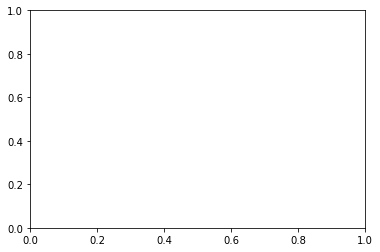

In [21]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(20, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
for i in iteration_based_coherence_values:
    print(i)

0.5588149805324384
0.5600149684985709
0.5489612406440963
0.5788690736719415
0.5704284708537619
0.5799963899169895


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

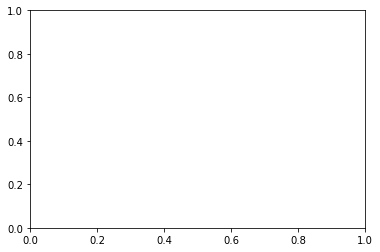

In [40]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20 ,iterations=3500, id2word=id2word,  alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_excel("D:/so-data/final-data-september-framework/react_native_topic_keywords.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5350560469653054


In [27]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents, contents2], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'texts', 'title']
df_dominant_topic.to_excel("D:/so-data/final-data-september-framework/final_topics_with_body_react_native.xlsx")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
